# Assignment for Week 8

## Final Project     

Week's 8 assignment will be work towards the final project.    

### About Final Project     


The final project will be a competition submission to any of the platforms available such as Kaggle. The competition will require to either build a Linear Regression or Logistic Regression model. 

The instructor will notify students by week 7 on the competition and the submissions.  This competition will include some or all the material and skills learned in the course.

Students are required to submit the final version of work/codes as a Jupyter Notebook via colab as submitted to the competition along with the link to their account pointing to their score on the competition's board. This will be evaluated and graded for the entire project for the duration of week 8-12. 



## Tasks

**Required:**    

*   Open an account to the decided competition's platform and download the data sets (train, test, etc) needed to compete.    
*   Start working with your data, get to know the data. Read all the competition information provided to the hosting platform. Try to get familiar with the data, topic, etc.      
*   Submit the link of your competition's account via BlueQuill. 

**Pump-it Up Water Project - Tanzanian Ministry of Water**

Competition Challenge - using data from "Taarifa" and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition.

Predict one of these three classes based on several variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which water points will fail can improve maintenance operaations and ensure that clean, potable water is available to communities across Tanzania.

A training dataset with information of nearly sixty thousand water points across Tanzania is provided its use is expected to build a model that will be able to predict which water points are functional, nonfunctional, and functional but need repair on a test dataset.

In [ ]:
# Let's load pandas and see the first few rows of data of the Pump-it Up dataset.
import pandas as pd
import os
import sys
water = pd.read_csv('https://raw.githubusercontent.com/bradley1958/DATA612_FINAL_PROJECT/master/BRAD_TANZANIAN_WELL_TEST_SET.csv')
water.head(5)



,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,basin,basin_code,region,region_code,district_code,population,construction_year,extraction_type,extraction_type_code,water_quality,water_quality_code,quantity,quantity_group_code,source,source_type_code,source_class,source_class_code,waterpoint_type,waterpoint_type_code,status_group,status_group_codes
0,50785,0.0,2/4/2013,1996,35.290799,-4.059696,0,Internal,1,Manyara,21,3,321,2012,other,4,good,1,seasonal,4,rainwater harvesting,4,surface,2,other,6,Non Functional,0
1,51630,0.0,2/4/2013,1569,36.656709,-3.309214,0,Pangani,6,Arusha,2,2,300,2000,gravity,1,good,1,insufficient,3,spring,7,groundwater,1,communal standpipe,2,Non Functional,0
2,17168,0.0,2/1/2013,1567,34.767863,-5.004344,0,Internal,1,Singida,13,2,500,2010,other,4,good,1,insufficient,3,rainwater harvesting,4,surface,2,other,6,Functional,1
3,45559,0.0,1/22/2013,267,38.058046,-9.418672,0,Ruvuma / Southern Coast,8,Lindi,80,43,250,1987,other,4,good,1,dry,1,shallow well,6,groundwater,1,other,6,Functional,1
4,49871,500.0,3/27/2013,1260,35.006123,-10.950412,0,Ruvuma / Southern Coast,8,Ruvuma,10,3,60,2000,gravity,1,good,1,enough,2,spring,7,groundwater,1,communal standpipe,2,Non Functional,0


In [ ]:
# Let's load additional pandas features
import time
import seaborn as sns
import warnings
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import matplotlib.image as mpimg
import numpy as np
import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals.six import StringIO
from sklearn import tree
import scipy.stats as stats
from pandas import set_option
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBClassifier
from datetime import datetime
import sys




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
# Let's see our Dtype information
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    14850 non-null  int64  
 1   amount_tsh            14850 non-null  float64
 2   date_recorded         14850 non-null  object 
 3   gps_height            14850 non-null  int64  
 4   longitude             14850 non-null  float64
 5   latitude              14850 non-null  float64
 6   num_private           14850 non-null  int64  
 7   basin                 14850 non-null  object 
 8   basin_code            14850 non-null  int64  
 9   region                14850 non-null  object 
 10  region_code           14850 non-null  int64  
 11  district_code         14850 non-null  int64  
 12  population            14850 non-null  int64  
 13  construction_year     14850 non-null  int64  
 14  extraction_type       14850 non-null  object 
 15  extraction_type_cod

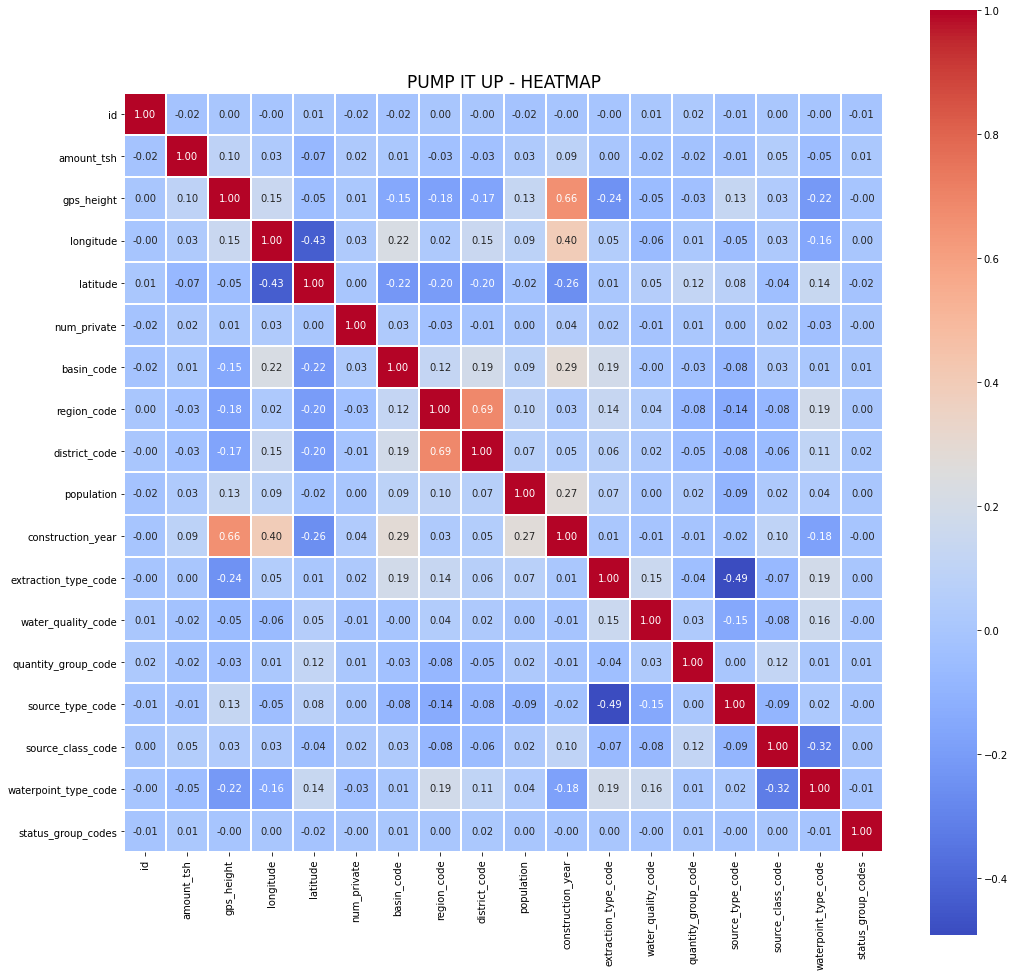

In [ ]:
# Let's do a Correlation Matrix 
corr = water.corr()
f, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(corr, square=True, cbar=True, annot=True, fmt='.2f',
            xticklabels=True, yticklabels=True, 
            cmap="coolwarm", linewidth=1, ax=ax)
plt.title('PUMP IT UP - HEATMAP', size=17);



In [ ]:
# Let's create a count of Status Group values by Waterpoint Type with a Bar Chart
water_type = water.groupby('status_group')[['waterpoint_type']].count()
print(water_type)



                waterpoint_type
status_group                   
Functional                 6669
Non Functional             8181


In [ ]:
# Let's see the Numeric Coding for the Waterpoint Type
water_type = water.groupby('waterpoint_type')[['status_group']].count()
print(water_type)

                             status_group
waterpoint_type                          
cattle trough                          34
communal standpipe                   7106
communal standpipe multiple          1508
dam                                     1
hand pump                            4396
improved spring                       175
other                                1630


In [ ]:
# Let's see the above sum of the Waterpoint Type
water_type = water.groupby('waterpoint_type')[['status_group']].count().sum()
print(water_type)

status_group    14850
dtype: int64


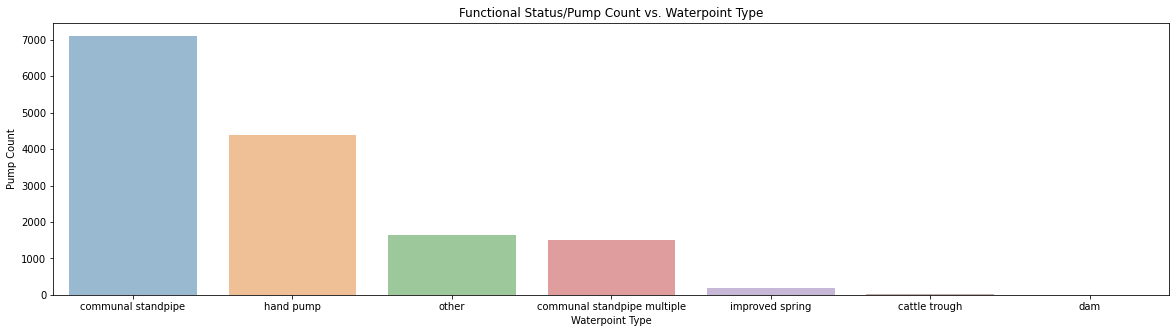

In [ ]:
pump_count = water['waterpoint_type'].value_counts()
pump_count = pump_count[:7,]
plt.figure(figsize=(20,5))
sns.barplot(pump_count.index, pump_count.values, alpha=0.5)
plt.title('Functional Status/Pump Count vs. Waterpoint Type')
plt.ylabel('Pump Count')
plt.xlabel('Waterpoint Type')
plt.show()

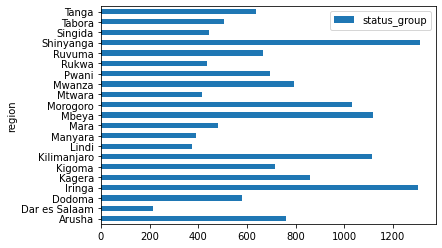

In [ ]:
# Let's create a count of Status Group values by Region with a Bar Chart
region = water.groupby('region')[['status_group']].count()
region.plot(kind='barh')


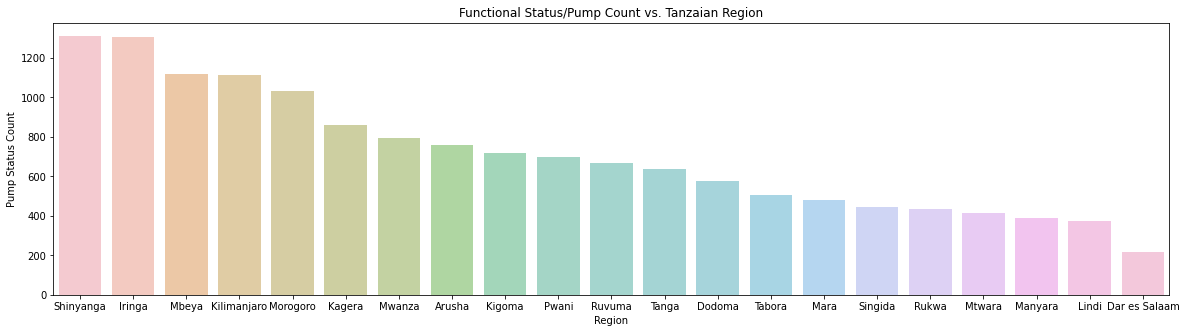

In [ ]:
region_count = water['region'].value_counts()
region_count = region_count[:21,]
plt.figure(figsize=(20,5))
sns.barplot(region_count.index, region_count.values, alpha=0.5)
plt.title('Functional Status/Pump Count vs. Tanzaian Region')
plt.ylabel('Pump Status Count')
plt.xlabel('Region')
plt.show()





In [ ]:
# Let's reverse the above chart to look at functional well status in the region
region = water.groupby('region')[['status_group_codes']].count()
print(region)


               status_group_codes
region                           
Arusha                        761
Dar es Salaam                 215
Dodoma                        578
Iringa                       1305
Kagera                        858
Kigoma                        717
Kilimanjaro                  1115
Lindi                         374
Manyara                       389
Mara                          482
Mbeya                        1119
Morogoro                     1032
Mtwara                        414
Mwanza                        795
Pwani                         696
Rukwa                         434
Ruvuma                        666
Shinyanga                    1311
Singida                       443
Tabora                        507
Tanga                         639


In [ ]:
# Let's try and replace our zero's in the Construction Year Column with the "median value" for that Column
print(water['construction_year'].median())
print(water['population'].median())
print(water['gps_height'].median())


1986.0
20.0
344.0


In [ ]:
water['construction_year'] = water['construction_year'].replace(0, 1986.0)
water.head(5)

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,basin,basin_code,region,region_code,district_code,population,construction_year,extraction_type,extraction_type_code,water_quality,water_quality_code,quantity,quantity_group_code,source,source_type_code,source_class,source_class_code,waterpoint_type,waterpoint_type_code,status_group,status_group_codes
0,50785,0.0,2/4/2013,1996,35.290799,-4.059696,0,Internal,1,Manyara,21,3,321,2012,other,4,good,1,seasonal,4,rainwater harvesting,4,surface,2,other,6,Non Functional,0
1,51630,0.0,2/4/2013,1569,36.656709,-3.309214,0,Pangani,6,Arusha,2,2,300,2000,gravity,1,good,1,insufficient,3,spring,7,groundwater,1,communal standpipe,2,Non Functional,0
2,17168,0.0,2/1/2013,1567,34.767863,-5.004344,0,Internal,1,Singida,13,2,500,2010,other,4,good,1,insufficient,3,rainwater harvesting,4,surface,2,other,6,Functional,1
3,45559,0.0,1/22/2013,267,38.058046,-9.418672,0,Ruvuma / Southern Coast,8,Lindi,80,43,250,1987,other,4,good,1,dry,1,shallow well,6,groundwater,1,other,6,Functional,1
4,49871,500.0,3/27/2013,1260,35.006123,-10.950412,0,Ruvuma / Southern Coast,8,Ruvuma,10,3,60,2000,gravity,1,good,1,enough,2,spring,7,groundwater,1,communal standpipe,2,Non Functional,0


In [ ]:
water['population'] = water['population'].replace(0, 20.0)
water.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,basin,basin_code,region,region_code,district_code,population,construction_year,extraction_type,extraction_type_code,water_quality,water_quality_code,quantity,quantity_group_code,source,source_type_code,source_class,source_class_code,waterpoint_type,waterpoint_type_code,status_group,status_group_codes
0,50785,0.0,2/4/2013,1996,35.290799,-4.059696,0,Internal,1,Manyara,21,3,321,2012,other,4,good,1,seasonal,4,rainwater harvesting,4,surface,2,other,6,Non Functional,0
1,51630,0.0,2/4/2013,1569,36.656709,-3.309214,0,Pangani,6,Arusha,2,2,300,2000,gravity,1,good,1,insufficient,3,spring,7,groundwater,1,communal standpipe,2,Non Functional,0
2,17168,0.0,2/1/2013,1567,34.767863,-5.004344,0,Internal,1,Singida,13,2,500,2010,other,4,good,1,insufficient,3,rainwater harvesting,4,surface,2,other,6,Functional,1
3,45559,0.0,1/22/2013,267,38.058046,-9.418672,0,Ruvuma / Southern Coast,8,Lindi,80,43,250,1987,other,4,good,1,dry,1,shallow well,6,groundwater,1,other,6,Functional,1
4,49871,500.0,3/27/2013,1260,35.006123,-10.950412,0,Ruvuma / Southern Coast,8,Ruvuma,10,3,60,2000,gravity,1,good,1,enough,2,spring,7,groundwater,1,communal standpipe,2,Non Functional,0


In [ ]:
water['gps_height'] = water['gps_height'].replace(0, 344.0)
water.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,basin,basin_code,region,region_code,district_code,population,construction_year,extraction_type,extraction_type_code,water_quality,water_quality_code,quantity,quantity_group_code,source,source_type_code,source_class,source_class_code,waterpoint_type,waterpoint_type_code,status_group,status_group_codes
0,50785,0.0,2/4/2013,1996,35.290799,-4.059696,0,Internal,1,Manyara,21,3,321,2012,other,4,good,1,seasonal,4,rainwater harvesting,4,surface,2,other,6,Non Functional,0
1,51630,0.0,2/4/2013,1569,36.656709,-3.309214,0,Pangani,6,Arusha,2,2,300,2000,gravity,1,good,1,insufficient,3,spring,7,groundwater,1,communal standpipe,2,Non Functional,0
2,17168,0.0,2/1/2013,1567,34.767863,-5.004344,0,Internal,1,Singida,13,2,500,2010,other,4,good,1,insufficient,3,rainwater harvesting,4,surface,2,other,6,Functional,1
3,45559,0.0,1/22/2013,267,38.058046,-9.418672,0,Ruvuma / Southern Coast,8,Lindi,80,43,250,1987,other,4,good,1,dry,1,shallow well,6,groundwater,1,other,6,Functional,1
4,49871,500.0,3/27/2013,1260,35.006123,-10.950412,0,Ruvuma / Southern Coast,8,Ruvuma,10,3,60,2000,gravity,1,good,1,enough,2,spring,7,groundwater,1,communal standpipe,2,Non Functional,0


So, we can see that we have replaced all the zero's in the water dataframe who's columns had far too many zero's with the 'median" values - those columns being: "construction_year", "population', and "gps_height'. 

In [ ]:
# let's create a subset for our water project
# We will pull the most important categorical variables along with our target variable "status_group"
subset_water = water[['id','amount_tsh','gps_height','basin_code','region_code','district_code','population','construction_year','extraction_type_code','water_quality_code','quantity_group_code','source_type_code','waterpoint_type_code','status_group_codes']]
subset_water.head(5)


,id,amount_tsh,gps_height,basin_code,region_code,district_code,population,construction_year,extraction_type_code,water_quality_code,quantity_group_code,source_type_code,waterpoint_type_code,status_group_codes
0,50785,0.0,1996,1,21,3,321,2012,4,1,4,4,6,0
1,51630,0.0,1569,6,2,2,300,2000,1,1,3,7,2,0
2,17168,0.0,1567,1,13,2,500,2010,4,1,3,4,6,1
3,45559,0.0,267,8,80,43,250,1987,4,1,1,6,6,1
4,49871,500.0,1260,8,10,3,60,2000,1,1,2,7,2,0


In [ ]:
# Let's check for null values
subset_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    14850 non-null  int64  
 1   amount_tsh            14850 non-null  float64
 2   gps_height            14850 non-null  int64  
 3   basin_code            14850 non-null  int64  
 4   region_code           14850 non-null  int64  
 5   district_code         14850 non-null  int64  
 6   population            14850 non-null  int64  
 7   construction_year     14850 non-null  int64  
 8   extraction_type_code  14850 non-null  int64  
 9   water_quality_code    14850 non-null  int64  
 10  quantity_group_code   14850 non-null  int64  
 11  source_type_code      14850 non-null  int64  
 12  waterpoint_type_code  14850 non-null  int64  
 13  status_group_codes    14850 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.6 MB


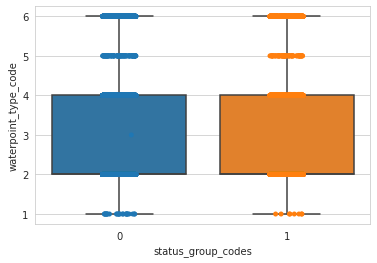

In [ ]:
# Let's look at a boxplot of Status Group vs. Source Type
sns.set_style('whitegrid')
ax = sns.boxplot(x='status_group_codes', y='waterpoint_type_code', data=subset_water)
ax = sns.stripplot(x='status_group_codes', y='waterpoint_type_code', data=subset_water)

Zero = Non Functional

One = Functional

In [ ]:
# Let's take an additional subset from our data slice (subset_water)
subset_water_2 = subset_water[['district_code','gps_height','source_type_code','status_group_codes']]
subset_water_2.head()

,district_code,gps_height,source_type_code,status_group_codes
0,3,1996,4,0
1,2,1569,7,0
2,2,1567,4,1
3,43,267,6,1
4,3,1260,7,0


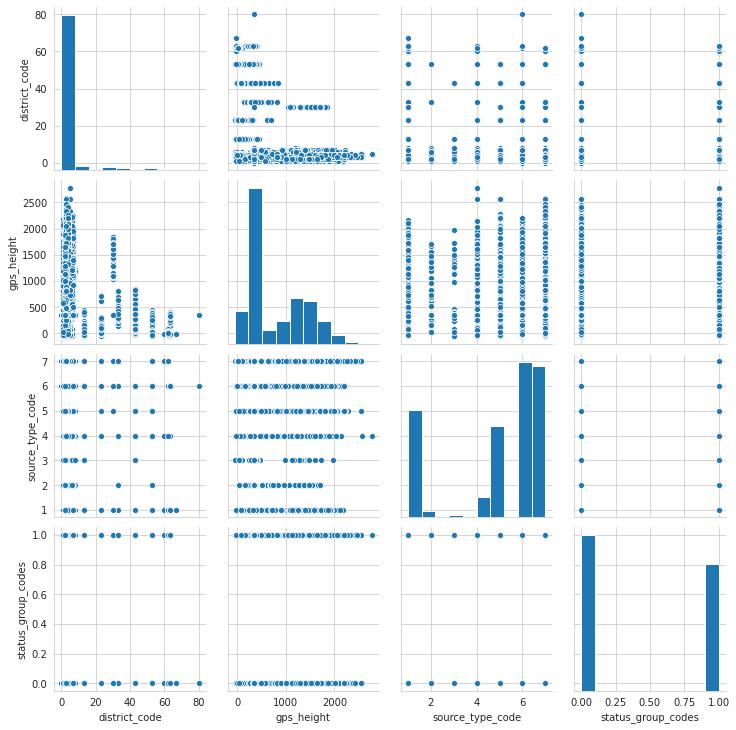

In [ ]:
# lets's look at a Seaborn Pair's PLot of these features
sns.pairplot(subset_water_2)

In [ ]:
# Spliting the data into Train and Test Sets and looking at the shape of the Train/Test Sets
X = subset_water.drop('status_group_codes', axis=1)
y = subset_water['status_group_codes']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)
print('Training Set: ', X_train.shape, y_train.shape)
print('Testing Set: ', X_test.shape, y_test.shape)




Training Set:  (11137, 13) (11137,)
Testing Set:  (3713, 13) (3713,)


Accuarcy: 0.5510368973875572

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2046
           1       0.00      0.00      0.00      1667

    accuracy                           0.55      3713
   macro avg       0.28      0.50      0.36      3713
weighted avg       0.30      0.55      0.39      3713


Average 5-Fold CV Score: 0.551 , Standard Deviation: 0.0002


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


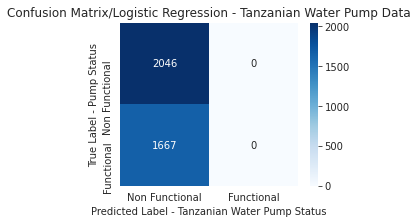

In [ ]:
# Let's try Logistic Regression
LR = LogisticRegression(C=0.00008, random_state=123)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuarcy:', metrics.accuracy_score(y_pred, y_test))

## 5-Fold Cross Validation
cv_scores = cross_val_score(LR, X, y, cv=5)

# Print the 5-Fold Cross Validation Scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard Deviation: {}".format(round(np.std(cv_scores),4)))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix, annot=True, cmap="Blues", fmt='d',
            xticklabels = ['Non Functional', 'Functional'],
            yticklabels = ['Non Functional', 'Functional'])

plt.ylabel('True Label - Pump Status')
plt.xlabel('Predicted Label - Tanzanian Water Pump Status')
plt.title("Confusion Matrix/Logistic Regression - Tanzanian Water Pump Data");


In [ ]:
# Let's see if we can get a Decision Tree Classification Model to run
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X_train, y_train)
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
## 5-Fold Cross Validation
cv_scores = cross_val_score(dtc, X, y, cv=5)


              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2046
           1       0.00      0.00      0.00      1667

    accuracy                           0.55      3713
   macro avg       0.28      0.50      0.36      3713
weighted avg       0.30      0.55      0.39      3713


Average 5-Fold CV Score: 0.551 , Standard Devation: 0.0002


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


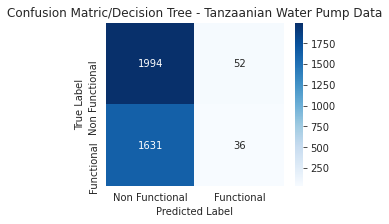

In [ ]:
# Let's print the 5-Fold Cross Validation Scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}". format(round(np.mean(cv_scores),4)),
      ", Standard Devation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,dtc.predict(X_test))
sns.heatmap(ConfMatrix, annot=True, cmap="Blues", fmt='d',
            xticklabels = ['Non Functional', 'Functional'],
            yticklabels = ['Non Functional', 'Functional'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Confusion Matric/Decision Tree - Tanzaanian Water Pump Data");

In [ ]:
# Let's Predict with Accuracy Evaluation
yhat= dtc.predict(X_test)
print('Training Set Accuracy: ', metrics.accuracy_score(y_train, dtc.predict(X_train)))
print('Test Set Accuracy: ', metrics.accuracy_score(y_test, yhat))


Training Set Accuracy:  0.5562539283469516
Test Set Accuracy:  0.5467277134392674


Next, Let's try an build a Random Forest Classifier, and then fold in with Grid Search/Cross Validation Model.

In [ ]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=7).fit(X_train, y_train)
yhatRF = rfc.predict(X_test)
print('Training Set Accuracy: ', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Testing Set Accuracy: ', metrics.accuracy_score(y_test, yhatRF))


Training Set Accuracy:  0.5755589476519709
Testing Set Accuracy:  0.5464583894424994


In [ ]:
# RFC with Grid Search and Cross Validation
rfc_params = {'n_estimators':[2,5,10,20,50,75,150],
              'criterion':['gini', 'entropy'],
              'max_depth':[2,5,10,20,50,None],
              'min_samples_split':[2,5,10,20]}

grid_rfc = GridSearchCV(RandomForestClassifier(),
                        rfc_params, 
                        cv=5,
                        scoring='accuracy').fit(X_train, y_train)

yhatGS = grid_rfc.predict(X_test)

print('Training Set Accuracy: ', metrics.accuracy_score(y_train, grid_rfc.predict(X_train)))
print('Testing Set Accuracy: ', metrics.accuracy_score(y_test, yhatGS))


Training Set Accuracy:  0.559935350633025
Testing Set Accuracy:  0.5496902774037167



              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2046
           1       0.00      0.00      0.00      1667

    accuracy                           0.55      3713
   macro avg       0.28      0.50      0.36      3713
weighted avg       0.30      0.55      0.39      3713


Average 5-Fold CV Scores: 0.5494 , Standard Deviation: 0.0026


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


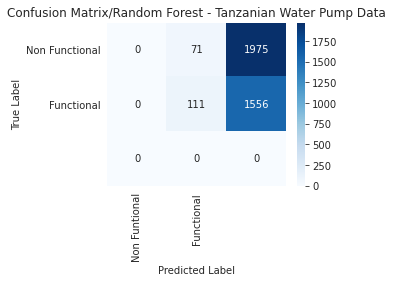

In [ ]:
## 5-Fold Cross-Validation
cv_scores = cross_val_score(rfc, X, y, cv=5)

# Print the 5-Fold Cross-Validation Scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Scores: {}".format(round(np.mean(cv_scores),4)),
      ", Standard Deviation: {}".format(round(np.std(cv_scores),4)))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,rfc.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt='d',
            xticklabels = ['Non Funtional', 'Functional'],
            yticklabels = ['Non Functional', 'Functional'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Confusion Matrix/Random Forest - Tanzanian Water Pump Data");

         

Next, let's run a comparision of the varioius model's performance using a ROC graph.

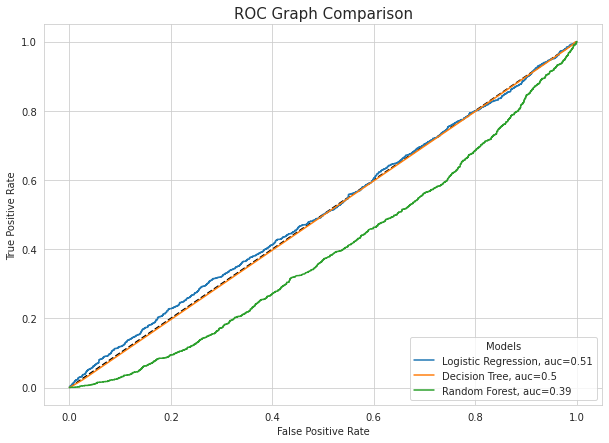

In [ ]:
y_pred_proba_log = LR.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_proba_log)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_log)

y_pred_proba_dtc = dtc.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_proba_dtc)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_dtc)

y_pred_proba_rfc = rfc.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_proba_rfc)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_rfc)


plt.figure(figsize=(10,7))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1,tpr1,label="Logistic Regression, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Random Forest, auc="+str(round(auc3,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph Comparison', size=15)
plt.box(True)
plt.savefig('ImageName', format='png', dpi=200, transparent=False);

Next, let's run the test data through the model and make predictions.

In [ ]:
X2 = subset_water.drop(columns = ['id']).values
yhat2 = grid_rfc.predict(X2)
preds = pd.DataFrame(yhat2)
preds.head()

,0
0,1
1,0
2,1
3,1
4,0


In [ ]:
subset_water.shape, preds.shape

((14850, 14), (14850, 1))

So, we have two dataframes, the next step is to combine them into one dataframe. We will use the "concat" syntax to complete this action and combine the "id" column with the "status_group" colum. Afterward, the next step is to export the prediction to a CSV file.

In [ ]:
predict = pd.concat((subset_water['id'], preds), axis=1)
predict.columns=['id', 'status_group']
predict['status_group'].unique()


array([1, 0])

In [ ]:
predict.head(5)

,id,status_group
0,50785,1
1,51630,0
2,17168,1
3,45559,1
4,49871,0


In [ ]:
predict.tail(5)

,id,status_group
14845,39307,0
14846,18990,0
14847,28749,0
14848,33492,0
14849,68707,1


In [ ]:
# let's export this to a folder on my PC
predict.to_csv(r'C:\PANDAS\Mod3_export.csv', index=False, header=True)
print(predict)

          id  status_group
0      50785             1
1      51630             0
2      17168             1
3      45559             1
4      49871             0
...      ...           ...
14845  39307             0
14846  18990             0
14847  28749             0
14848  33492             0
14849  68707             1

[14850 rows x 2 columns]


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))